**name: jaiswal mahima brijesh
LETSGROWMORE INTERNSHIP BEGINNER LEVEL TASK-2
STOCK MARKET PREDICTION AND FORECASTING USING STACKED LSTM PROJECT

# **Importing Libraries:
These are the necessary libraries for data manipulation (pandas), plotting (matplotlib), numerical operations (numpy), and scaling data (MinMaxScaler).

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# **Loading and Preprocessing Data:
The stock market data is loaded from a CSV file into a Pandas DataFrame. The Date column is converted to datetime format.

In [6]:
# Load the dataset from the given URL
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
data = pd.read_csv(url)


In [7]:
data['Date'] = pd.to_datetime(data['Date'])


In [5]:
data.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [8]:

data.tail()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


# **Sorting and Resetting Index:
The data is sorted based on the date and the index is reset.

In [3]:
df=data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [5]:
df.reset_index(inplace=True)
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


# **Data Scaling:
The closing stock prices are extracted and scaled between 0 and 1 using Min-Max scaling.

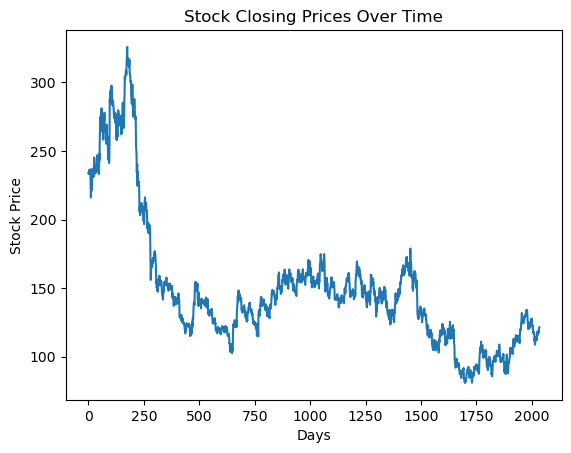

In [11]:
plt.plot(data['Close'])
plt.title('Stock Closing Prices Over Time')
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.show()

In [12]:
# Normalize the closing prices
scaler = MinMaxScaler(feature_range=(0,1))
data['Close'] = scaler.fit_transform(np.array(data['Close']).reshape(-1, 1))


In [13]:
df1=df['Close']
     

scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [14]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [15]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]
     

training_size,test_size

(1424, 611)

# **Creating Time Series Dataset:
A time series dataset is created with a specified time step. This involves creating input sequences (X_train, X_test) and corresponding output values (y_train, ytest).

In [23]:

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [24]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [25]:
print(X_train.shape), print(y_train.shape)

(1323, 100)
(1323,)


(None, None)

In [26]:
print(X_test.shape), print(ytest.shape)

(510, 100)
(510,)


(None, None)

# **Reshaping Data for LSTM:
The data is reshaped to fit the input requirements of the LSTM model.

In [27]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# **Building the LSTM Model:
A sequential LSTM model is defined with three LSTM layers and one Dense layer. It is compiled using the mean squared error loss function and the Adam optimizer.

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
     

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# **Training the Model:
The model is trained on the training data for 60 epochs with a batch size of 64.

In [29]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60

19/19 [==============================] - 28s 336ms/step - loss: 0.0102 - val_loss: 0.0012
Epoch 2/60
19/19 [==============================] - 4s 194ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 3/60
19/19 [==============================] - 3s 163ms/step - loss: 9.2738e-04 - val_loss: 0.0012
Epoch 4/60
19/19 [==============================] - 3s 155ms/step - loss: 8.3605e-04 - val_loss: 0.0011
Epoch 5/60
19/19 [==============================] - 3s 178ms/step - loss: 7.9325e-04 - val_loss: 0.0011
Epoch 6/60
19/19 [==============================] - 3s 175ms/step - loss: 7.7591e-04 - val_loss: 0.0011
Epoch 7/60
19/19 [==============================] - 3s 164ms/step - loss: 7.6099e-04 - val_loss: 0.0010
Epoch 8/60
19/19 [==============================] - 3s 170ms/step - loss: 7.5122e-04 - val_loss: 9.5951e-04
Epoch 9/60
19/19 [==============================] - 4s 208ms/step - loss: 7.1568e-04 - val_loss: 9.2619e-04
Epoch 10/60
19/19 [==============================] - 3s 182ms/

# **Making Predictions and Inverse Scaling:
The model is used to make predictions on the test data, and the predictions are inverse scaled to get them back to the original scale.

In [30]:

test_predict=model.predict(X_test)
     

test_predict1=scaler.inverse_transform(test_predict)
     

test_predict1

16/16 [==============================] - 3s 47ms/step


array([[0.24634002],
       [0.24746384],
       [0.24494936],
       [0.23617922],
       [0.2291747 ],
       [0.22547464],
       [0.22789516],
       [0.23310357],
       [0.23579721],
       [0.2359556 ],
       [0.23569432],
       [0.23934768],
       [0.24226362],
       [0.24778289],
       [0.25572076],
       [0.25109708],
       [0.24312846],
       [0.239921  ],
       [0.24026458],
       [0.25547904],
       [0.27207935],
       [0.28329208],
       [0.28793085],
       [0.28290528],
       [0.28091514],
       [0.27855802],
       [0.27855894],
       [0.2834241 ],
       [0.28670973],
       [0.2879381 ],
       [0.2898107 ],
       [0.28668845],
       [0.2761541 ],
       [0.2563655 ],
       [0.24132295],
       [0.23406227],
       [0.23236784],
       [0.22977978],
       [0.22307725],
       [0.21124056],
       [0.20140149],
       [0.19531825],
       [0.1871911 ],
       [0.18298994],
       [0.17570023],
       [0.16633077],
       [0.16226758],
       [0.160

# **Evaluation:
The root mean squared error is calculated to evaluate the model's performance.
In summary, the code involves loading stock market data, preprocessing it, creating a time series dataset, building and training an LSTM model, making predictions, and evaluating the model's performance using root mean squared error. The goal is to predict stock prices based on historical data.

In [31]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(ytest,test_predict))
     

0.04556585399703959